<a href="https://colab.research.google.com/github/01-Projects-In-Python/Project-Yelp-SenimentAnalysis-UsingNLP/blob/main/Project-Yelp-SenimentAnalysis-UsingNLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Project Seniment Analysis using NLP

###__Exploratory data analysis:__

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import nltk
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv("yelp.csv")

In [ ]:
df.head(5)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [ ]:
df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


#### - Visualizing the dataset:

In [ ]:
# Let's get the length of the messages
df['length'] = df['text'].apply(len)
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


<Axes: ylabel='Frequency'>

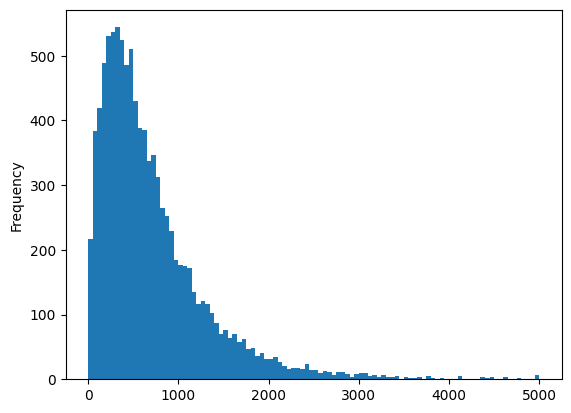

In [ ]:
df['length'].plot(bins=100, kind='hist')

In [ ]:
df.length.describe()

count    10000.000000
mean       710.738700
std        617.399827
min          1.000000
25%        294.000000
50%        541.500000
75%        930.000000
max       4997.000000
Name: length, dtype: float64

In [ ]:
# Let's see the longest message 43952
df[df['length'] == 4997]['text'].iloc[0]

'In our continuing quest to identify cool, locally owned places to eat and/or drink, Caroline and I auditioned Vintage 95 last night. \n\nBefore I go further, understand that whenever I go out for eats or drinks, I have  in  mind a Platonic Ideal of the Bar/Pub/Eatery I most want to frequent. I\'m on a constant quest to find that  Ideal expressed in Real Life. \n\nVintage 95 isn\'t quite there, but it\'s damn close. If I ever give something Five Stars, you\'ll know it has pegged my Platonic Ideal. Anyway...\n\nThe plan last night was for drinks. No plans for food, just Adult Beverages and warm conversation. But it turned into more.\n\nThe location in downtown Chandler is terrific for us. The owners have created a very fine visual experience - leather, stone, dark woods, good lighting. And they don\'t have the music turned up so loud that you CANNOT HAVE A CONVERSATION. This is one of my pet peeves. If I want to stare at people move their mouths while enduring an aural assault, I\'ll st

In [ ]:
# Let's see the shortest message
df[df['length'] == 1]['text'].iloc[0]

'X'

In [ ]:
# Let's see the message with mean length
df[df['length'] == 710]['text'].iloc[0]

"I went here for lunch a couple of weeks ago with my bosses. It was packed on a Friday - we sat at the bar and our cook was fantastic! We got to sit and chat with him while he worked away at the orders. I had the chicken pesto pasty and it was wonderful! the bread used is similar to a pastry dough type...but not as sweet. The pasty was so filling, I could barely finish it.\n\nMy bosses have been there before and have always wanted to try the peanut butter and jelly pasty - so we all split it as dessert and it was so good. They put bananas in it and drizzle jelly over the whole pasty. It's definitely rich and gooey. \n\nI would totally go back here again and have told my friends about it too! Amazing place."

<Axes: xlabel='count', ylabel='stars'>

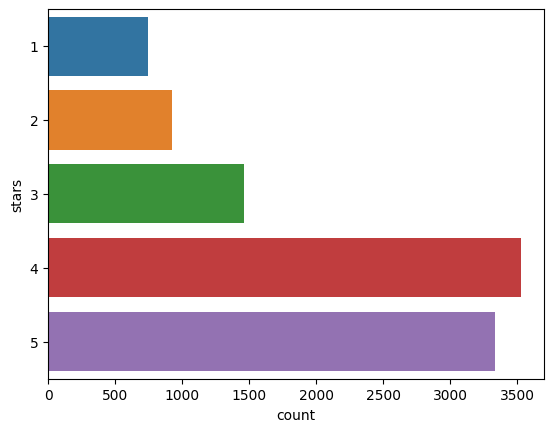

In [ ]:
sns.countplot(y = 'stars', data=df)

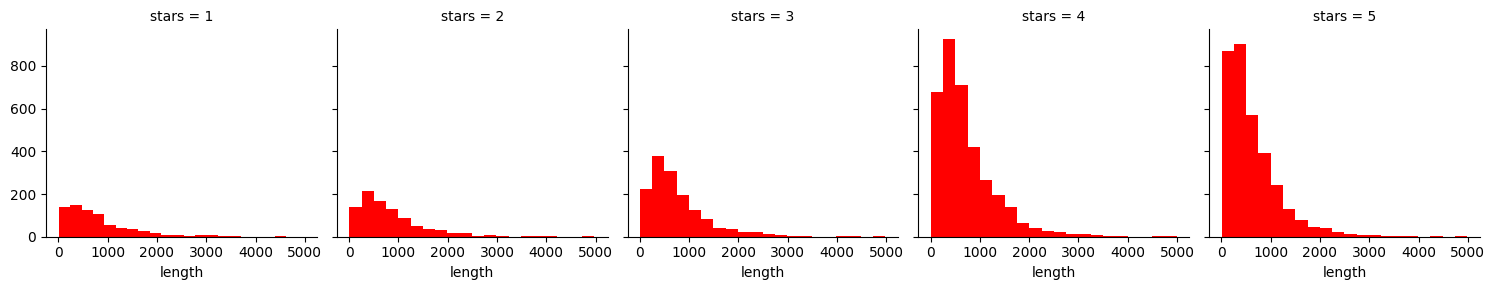

In [ ]:
g = sns.FacetGrid(data=df, col='stars', col_wrap=5)
g.map(plt.hist, 'length', bins = 20, color = 'r')

####__- Point 1. Combine Multiple star reviews of 1,2 and 3 stars to make the data balance along with 4 and 5 star reviews.__

To combine 1, 2, and 3-star reviews into a single category, you can create a new column called combined_stars. In this new column, stars 1, 2, and 3 will be assigned a value of 1, while stars 4 and 5 will retain their original numbers.



In [ ]:
df['combined_stars'] = df['stars'].map({1:1, 2:1, 3:1, 4:4, 5:5})

In [ ]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length,combined_stars
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889,5
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345,5
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76,4
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419,5
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469,5


<Axes: xlabel='combined_stars', ylabel='count'>

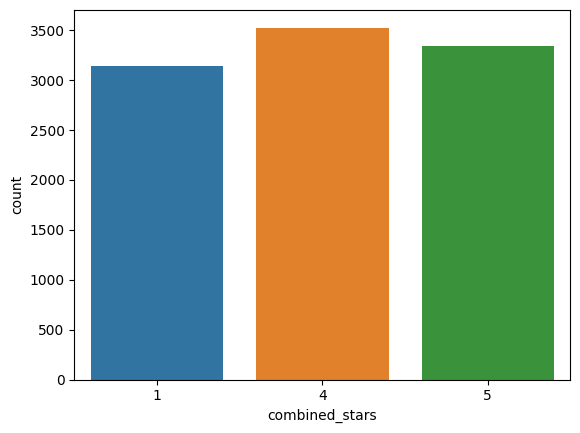

In [ ]:
sns.countplot(x = 'combined_stars', label = "Count", data = df)

In [ ]:
# See the proportion of the combination of the 1, 2, and 3 stars vs 4 and 5 stars:
comb_stars = len(df[df['combined_stars'] == 1])
comb_stars

3137

In [ ]:
print( '1 to 3 -Stars percentage =', round(comb_stars/ len(df)*100, 2),"%")
print( '4 -Stars percentage =', round(len(df[df['combined_stars'] == 4])/ len(df)*100, 2),"%")
print( '5 -Stars percentage =', round(len(df[df['combined_stars'] == 5])/ len(df)*100, 2),"%")

1 to 3 -Stars percentage = 31.37 %
4 -Stars percentage = 35.26 %
5 -Stars percentage = 33.37 %


As observed, the combined percentage of 1 to 3-star reviews accounts for 31.37% of the total reviews. In comparison, 4-star reviews represent 35.26% and 5-star reviews make up 33.37% of the dataset. By combining the 1 to 3-star ratings, we achieve a more balanced distribution of data, which is beneficial for modeling purposes.

#####__- Case 1:Applying the CountVectorizer technique to the dataset removing signs of punctuations and stopwords and build the model with the Multinomial Naive Bayes classifier__

As we examine the dataset, it appears that there are no missing values. However, the `text` column contains numerous punctuation signs and stopwords. These punctuation signs and stopwords can potentially impact the accuracy of the process, create noise and decrease the memory and storage efficiency in the process of converting the variable into a matrix counting the occurrences of each unique word (token) in the `text` column. To ensure accurate and more efficient results, we will remove these punctuation signs and stopwords from this column using the following function called `message_cleaning`.

In [ ]:
# Function to remove the punctuation signs and the stopwords:
def message_cleaning(message):
    Test_punc_removed = [w for w in message if w not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split()
                                    if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = message_cleaning)
yelp_countvectorizer = vectorizer.fit_transform(df['text'])

In [ ]:
print(vectorizer.get_feature_names_out())

['0' '00' '007' ... 'École' 'éclairs' 'ém']


In [ ]:
print(yelp_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
yelp_countvectorizer.shape

(10000, 44012)

#### - Building the model:

In [ ]:
#Splitting the data
X = yelp_countvectorizer
label = df['combined_stars'].values

In [ ]:
X.shape

(10000, 44012)

In [ ]:
label.shape

(10000,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, label, test_size=0.2)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
# Creating the model
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [ ]:
test = ['amazing food! highly recommmended']
test_countvectorizer = vectorizer.transform(test)
test_predict = NB_classifier.predict(test_countvectorizer)
test_predict

array([5])

In [ ]:
test2 = ['shit food, made me sick']
test2_countvectorizer = vectorizer.transform(test2)
test_predict2 = NB_classifier.predict(test2_countvectorizer)
test_predict2

array([1])

#### - Evaluating the model performance:

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

<Axes: >

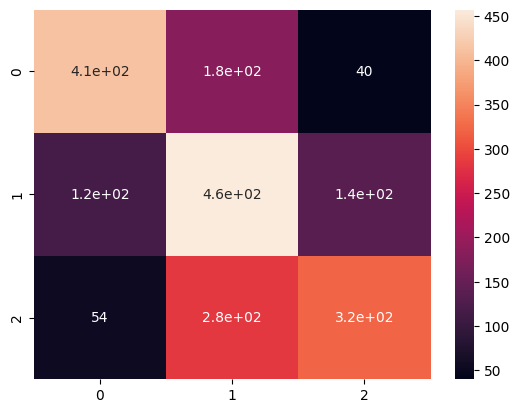

In [ ]:
y_predict = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.71      0.65      0.68       634
           4       0.50      0.65      0.56       708
           5       0.65      0.49      0.56       658

    accuracy                           0.59      2000
   macro avg       0.62      0.59      0.60      2000
weighted avg       0.61      0.59      0.60      2000



In [ ]:
accuracy_score = NB_classifier.score(X_test, y_test)
print('Model accuracy {0}'.format(accuracy_score))

Model accuracy 0.595


#####__- Case 2: Applying the TfidfVectorizer technique to the dataset without removing signs of punctuations and stopwords and build the model using XGBoost and Random Forest Classificator__

In this case, we will apply the TfidfVectorizer technique, which incorporates data cleaning directly into the process. This means that we will not need to separately remove punctuation signs or stopwords. TfidfVectorizer performs these tasks as part of its built-in preprocessing steps.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vect = TfidfVectorizer()
X_tfidf = tfidf_vect.fit_transform(df['text'])

In [ ]:
print(tfidf_vect.get_feature_names_out())

['00' '000' '007' ... 'école' 'ém' 'òc']


In [ ]:
print(X_tfidf.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
X_tfidf.shape

(10000, 29185)

#### - Building the model:

In [ ]:
#Splitting the data
X2 = X_tfidf
label2 = df['combined_stars'].values

In [ ]:
X2.shape

(10000, 29185)

In [ ]:
label2.shape

(10000,)

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, label2, test_size=0.2)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y2_train = le.fit_transform(y2_train)

In [ ]:
# Creating the model using XG Boost and Random Forest using the XGBRFClassifier for Classification
import xgboost
from xgboost import XGBRFClassifier

In [ ]:
model = XGBRFClassifier()

In [ ]:
model.fit(X2_train, y2_train)
y2_pred = model.predict(X2_test)

In [ ]:
y2_pred = le.inverse_transform(y2_pred)

In [ ]:
test3 = ['amazing food! highly recommmended']
test_tfidf = tfidf_vect.transform(test3)
test_predict3 = model.predict(test_tfidf)
test_predict3

array([2])

In [ ]:
test4 = ['shit food, made me sick']
test2_tfidf = tfidf_vect.transform(test4)
test_predict4 = model.predict(test2_tfidf)
test_predict4

array([2])

#### - Evaluating the model performance:

<Axes: >

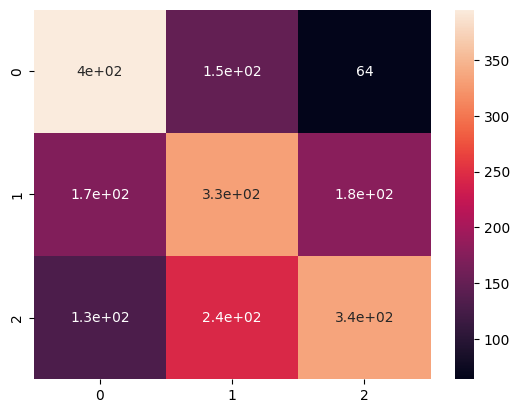

In [ ]:
cm2 = confusion_matrix(y2_test, y2_pred)
sns.heatmap(cm2, annot=True)

In [ ]:
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           1       0.57      0.65      0.61       608
           4       0.46      0.49      0.47       682
           5       0.58      0.47      0.52       710

    accuracy                           0.53      2000
   macro avg       0.53      0.54      0.53      2000
weighted avg       0.53      0.53      0.53      2000



In [ ]:
accuracy_score2 = accuracy_score(y2_test, y2_pred)
print('Model accuracy {0}'.format(accuracy_score2))

Model accuracy 0.5305


####__- Point 2. Undersampling the dataset.__

#####__- Case 3:Apply the CountVectorizer technique to the dataset while removing signs of punctuation and stopwords, undersample the data, and then build the model with the Multinomial Naive Bayes classifier__


To perform undersampling of the dataset based on the values of the `star` column, we will utilize the NearMiss algorithm, specifically using version 2. NearMiss version 2 works by selecting samples from the majority class that have the smallest average distance to the nearest samples from the minority class. This approach helps ensure that the selected samples are representative of the minority class and reduces the risk of discarding informative data.

By applying NearMiss version 2, we can create a more balanced dataset, which can improve the performance of our model, particularly in scenarios where the class distribution is highly imbalanced.

In [ ]:
from imblearn.under_sampling import NearMiss
nearmiss = NearMiss(version=2)
from collections import Counter

In [ ]:
# Performing the undersampling using the countvectorizing results:
X3 = yelp_countvectorizer
y3 = df['stars'].values

In [ ]:
X_nearmiss, y_nearmiss= nearmiss.fit_resample(X3, y3)

In [ ]:
# Check the number of records after over sampling
print(sorted(Counter(y_nearmiss).items()))

[(1, 749), (2, 749), (3, 749), (4, 749), (5, 749)]


#### - Building the model:

In [ ]:
# Splitting the data:
X_nearmiss.shape

(3745, 44012)

In [ ]:
y_nearmiss.shape

(3745,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X_nearmiss, y_nearmiss, test_size=0.2)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
# Creating the model
NB_classifier2 = MultinomialNB()
NB_classifier2.fit(X4_train, y4_train)

MultinomialNB()

In [ ]:
test5 = ['amazing food! highly recommmended']
test5_countvectorizer = vectorizer.transform(test5)
test5_predict = NB_classifier2.predict(test5_countvectorizer)
test5_predict

array([5])

In [ ]:
test6 = ['shit food, made me sick']
test6_countvectorizer = vectorizer.transform(test6)
test_predict6 = NB_classifier2.predict(test6_countvectorizer)
test_predict6

array([1])

#### - Evaluating the model performance:

In [ ]:
y_predict2 = NB_classifier2.predict(X4_test)

<Axes: >

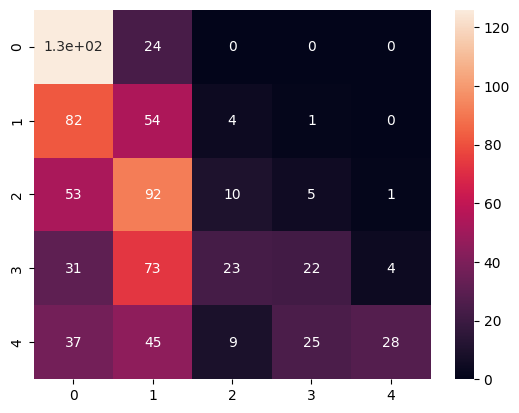

In [ ]:
cm3 = confusion_matrix(y4_test, y_predict2)
sns.heatmap(cm3, annot=True)

In [ ]:
print(classification_report(y4_test, y_predict2))

              precision    recall  f1-score   support

           1       0.38      0.84      0.53       150
           2       0.19      0.38      0.25       141
           3       0.22      0.06      0.10       161
           4       0.42      0.14      0.21       153
           5       0.85      0.19      0.32       144

    accuracy                           0.32       749
   macro avg       0.41      0.32      0.28       749
weighted avg       0.41      0.32      0.28       749



In [ ]:
accuracy_score3 = NB_classifier2.score(X4_test, y4_test)
print('Model accuracy {0}'.format(accuracy_score3))

Model accuracy 0.3204272363150868


#####__Case 4: Applying the TfidfVectorizer technique to the dataset without removing signs of punctuations and stopwords, undersample the data and then building the model using XGBoost and Random Forest Classificator__

In [ ]:
# Performing the undersampling using the countvectorizing results:
X4 = X_tfidf
y4 = df['stars'].values

In [ ]:
X2_nearmiss, y2_nearmiss= nearmiss.fit_resample(X4, y4)

In [ ]:
# Check the number of records after over sampling
print(sorted(Counter(y2_nearmiss).items()))

[(1, 749), (2, 749), (3, 749), (4, 749), (5, 749)]


#### - Building the model:

In [ ]:
# Splitting the data:
X2_nearmiss.shape

(3745, 29185)

In [ ]:
y2_nearmiss.shape

(3745,)

In [ ]:
X5_train, X5_test, y5_train, y5_test = train_test_split(X2_nearmiss, y2_nearmiss, test_size=0.2)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le2 = LabelEncoder()
y5_train = le2.fit_transform(y5_train)

In [ ]:
model2 = XGBRFClassifier()

In [ ]:
model2.fit(X5_train, y5_train)
y3_pred = model2.predict(X5_test)

In [ ]:
y3_pred = le2.inverse_transform(y3_pred)

In [ ]:
test7 = ['amazing food! highly recommmended']
test_tfidf7 = tfidf_vect.transform(test7)
test_predict7 = model2.predict(test_tfidf7)
test_predict7

array([4])

In [ ]:
test8 = ['shit food, made me sick']
test_tfidf8 = tfidf_vect.transform(test8)
test_predict8 = model2.predict(test_tfidf8)
test_predict8

array([0])

#### - Evaluating the model performance:

<Axes: >

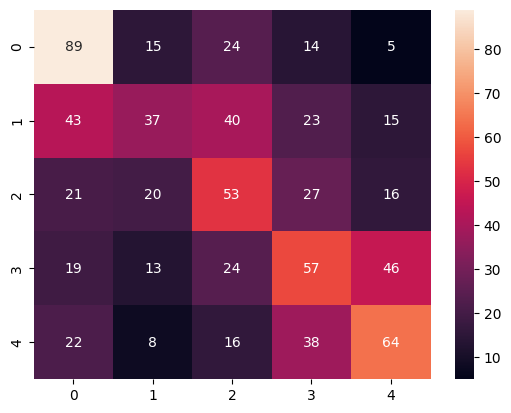

In [ ]:
cm4 = confusion_matrix(y5_test, y3_pred)
sns.heatmap(cm4, annot=True)

In [ ]:
print(classification_report(y5_test, y3_pred))

              precision    recall  f1-score   support

           1       0.46      0.61      0.52       147
           2       0.40      0.23      0.29       158
           3       0.34      0.39      0.36       137
           4       0.36      0.36      0.36       159
           5       0.44      0.43      0.44       148

    accuracy                           0.40       749
   macro avg       0.40      0.40      0.39       749
weighted avg       0.40      0.40      0.39       749



In [ ]:
accuracy_score4 = accuracy_score(y5_test, y3_pred)
print('Model accuracy {0}'.format(accuracy_score4))

Model accuracy 0.40053404539385845


###__General Conclusions:__

**After comparing the models that combined stars 1, 2, and 3, we can draw the following conclusions:

a. Case 1 - Model with Data Cleaning, CountVectorizer, and Multinomial Naive Bayes:

- The model that involved cleaning the data by removing punctuation signs and stopwords, using the CountVectorizer technique, and applying the Multinomial Naive Bayes classifier achieved an accuracy score of 59.5%. This indicates that the model performed well in predicting the star ratings.
- The classification report shows that the precision for the combined star rating group (1, 2, and 3 stars) is 71%. This suggests that the model correctly identifies these lower-rated reviews. Despite having a lower number of observations vs star rating 4 and 5, the model's classification performance is reliable.

b. Case 2 - Model with Data Cleaning, TfidfVectorizer, and XGBoost + Random Forest:

- The model that involved cleaning the data by removing punctuation signs and stopwords, using the TfidfVectorizer technique to create a matrix of token counters (which performed the cleaning in the built-in process), and utilizing the XGBoost + Random Forest algorithm (XGBRFClassifier) as the classifier achieved a lower accuracy score of 53%.
- According to the classification report, the precision is highest for star rating 5 with a score of 58%, followed by star rating 1 with 57%, and star rating 4 with 46%. Although the precision scores are relatively lower, it is notable that the results among the different star ratings are relatively close to each other.

In summary, both models showed some level of performance in predicting the star ratings. The first model with Multinomial Naive Bayes performed better overall, achieving a higher accuracy score and demonstrating a higher precision for the lower-rated reviews. On the other hand, the second model with XGBoost + Random Forest had a lower accuracy score but still provided reasonably close precision results among the different star ratings.

** After comparing the models that we undersampled using the NearMiss algorithm, we can draw the following conclusions:

a. Case 3 - Model with Data Cleaning, CountVectorizer, and Multinomial Naive Bayes:

- The model that involved cleaning the data by removing punctuation signs and stopwords, using the CountVectorizer technique, and applying the Multinomial Naive Bayes classifier achieved an accuracy score of 32%. This indicates that the model has a lower performance in predicting the star ratings compared to the other models.
- The classification report shows that the precision for star rating 5 is higher with a precision score of 85%. However, the model's performance is lower for star rating 3, with a precision score of only 19%. The recall score for star rating 3 is also low at 6%, indicating that the model fails to identify true positives for star rating 3 and has a low overall performance for this rating (f1-score of 10%).

b. Case 4 - Model with Data Cleaning, TfidfVectorizer, and XGBoost + Random Forest:

- The model that involved cleaning the data by removing punctuation signs and stopwords, using the TfidfVectorizer technique to create a matrix of token counters (which performed the cleaning in the built-in process), and utilizing the XGBoost + Random Forest algorithm (XGBRFClassifier) as the classifier achieved an accuracy score of 40%. Although this model performed slightly better than the previous model (undersampled + CountVectorizer + NB), the score is still lower than the models where the star ratings from 1 to 3 were grouped.
- According to the classification report, the precision is highest for star rating 1 with a score of 46%, followed by star rating 5 with 44%, and star rating 2 with 40%. In this case, we can see that the star rating 3 performed slightly better than in the previous model, and overall, the values between each star rating are not significantly distant from each other.

In conclusion, the models that involved undersampling using the NearMiss algorithm (Case 3 and 4) showed lower performance compared to the models that combined stars 1, 2, and 3 (Case 1 and 2). The Multinomial Naive Bayes model with CountVectorizer achieved better overall results (Case 1), while the XGBoost + Random Forest model with TfidfVectorizer had lower accuracy scores (Case 3) but still provided relatively close precision results among the different star ratings.




